<a href="https://colab.research.google.com/github/minjeong-kim-git/Kaggle-Practice/blob/main/Day%2001/Day01_Bag_of_Words_Meets_Bags_of_Popcorn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***코랩 공부하기***

*   구글 Colab은 웹에서 텍스트 기반의 코딩을 할 수 있도록 구글에서 제공하는 editor.
*   구글 Colab은 ***마크다운*** 기반
---
### Bag of Words Meets Bags of Popcorn

*  NLP 이해력을 높이기 위한 IMDB의 감정 분석 데이터
* 100,000개의 영화 리뷰로 구성

### 데이터 분석 과정
1. 문제 정의
2. 데이터 수집
3. 데이터 전처리
4. 데이터 모델링
5. 시각화 및 탐색

|이수 과목|담당 교수|이수 시간|
|------|---|---|
|언어공학개론|장OO|6일|
|Kaggle 실습|박OO|14일|
|프로젝트|오OO|28일|





In [1]:
!nvidia-smi

Thu Jun 29 11:48:43 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
! pwd

/content


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
# stat_104102.xlsx 읽어서 판다스 데이터프레임을 만들기
df = pd.read_excel('/content/drive/MyDrive/data/stat_104102.xlsx')
df

,통계표명:,시도별 인구 변동 현황,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,도시,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1,계,49540,49773,50515,50734,50948,51141,51328,51529,51696,51778
2,서울,10201,10208,10312,10250,10195,10144,10103,10022,9930,9857
3,부산,3565,3543,3568,3551,3538,3528,3519,3513,3498,3470
4,대구,2493,2489,2512,2508,2506,2502,2493,2487,2484,2475
5,인천,2693,2710,2758,2801,2844,2880,2903,2925,2943,2948
6,광주,1423,1433,1455,1463,1469,1473,1476,1472,1469,1463
7,대전,1481,1484,1504,1516,1525,1533,1532,1518,1514,1502
8,울산,1112,1114,1126,1136,1147,1156,1166,1173,1172,1165
9,세종,0,0,0,0,113,122,156,210,243,280


In [5]:
a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print(a[-1])
print(a[9])

print(a[:])

print(list(range(1, 11, 2)))
print(list(range(2, 11, 2)))

print(a[::-1])
print(list(reversed(a)))
a.reverse()
print(a)

10
10
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 3, 5, 7, 9]
[2, 4, 6, 8, 10]
[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]


# Bag of Words Meets Bags of Popcorn

### BOW(bag of words)
* 가장 간단하지만 효과적이라 널리쓰이는 방법
* 장, 문단, 문장, 서식과 같은 입력 텍스트의 구조를 제외하고 각 단어가 이 말뭉치에 얼마나 많이 나타나는지만 헤아린다.
* 구조와 상관없이 단어의 출현횟수만 세기 때문에 텍스트를 담는 가방(bag)으로 생각할 수 있다.
* BOW는 단어의 순서가 완전히 무시 된다는 단점이 있다. 예를 들어 의미가 완전히 반대인 두 문장이 있다고 하다.
    - `it's bad, not good at all.`
    - `it's good, not bad at all.`
* 위 두 문장은 의미가 전혀 반대지만 완전히 동일하게 반환된다.
* 이를 보완하기 위해 n-gram을 사용하는 데 BOW는 하나의 토큰을 사용하지만 n-gram은 n개의 토큰을 사용할 수 있도록 한다.

* [Bag-of-words model - Wikipedia](https://en.wikipedia.org/wiki/Bag-of-words_model)

In [6]:
import pandas as pd

"""
header = 0 은 파일의 첫 번째 줄에 열 이름이 있음을 나타내며
delimiter = \t 는 필드가 탭으로 구분되는 것을 의미한다.
quoting = 3은 쌍따옴표를 무시하도록 한다.
"""
# QUOTE_MINIMAL (0), QUOTE_ALL (1),
# QUOTE_NONNUMERIC (2) or QUOTE_NONE (3).

# 레이블인 sentiment 가 있는 학습 데이터
train = pd.read_csv('/content/drive/MyDrive/data/labeledTrainData.tsv', delimiter = '\t', header = 0, quoting = 3)
# 레이블이 없는 테스트 데이터
test = pd.read_csv('/content/drive/MyDrive/data/testData.tsv', delimiter = '\t', header = 0, quoting = 3)

In [7]:
# 학습 데이터 데이터형태(차원)를 확인한다.
train.shape

(25000, 3)

In [8]:
# 학습  데이터 마지막 3행을 보여준다.
train.tail(3)

,id,sentiment,review
24997,"""10905_3""",0,"""Guy is a loser. Can't get girls, needs to bui..."
24998,"""10194_3""",0,"""This 30 minute documentary Buñuel made in the..."
24999,"""8478_8""",1,"""I saw this movie as a child and it broke my h..."


In [9]:
# 테스트 데이터 데이터형태(차원)를 확인한다.
test.shape

(25000, 2)

In [14]:
# 테스트 데이터 마지막 3행을 보여준다.
test.tail(3)

,id,review
24997,"""2531_1""","""I was so disappointed in this movie. I am ver..."
24998,"""7772_8""","""From the opening sequence, filled with black ..."
24999,"""11465_10""","""This is a great horror film for people who do..."


In [10]:
# sentiment 컬럼의 유니크 값의 빈도를 계산한다.
train['sentiment'].value_counts()

1    12500
0    12500
Name: sentiment, dtype: int64

In [11]:
# 실제 데이터 review 컬럼의 데이터를 확인한다.
# html 태그가 섞여있기 때문에 이를 정제해줄 필요가 있음.
train['review'][0][:700]

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely lik'

In [12]:
from bs4 import BeautifulSoup

example1 = BeautifulSoup(train['review'][0][:700])
print(train['review'][0][:700])
example1.get_text()[:700]

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely lik


'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.Visually impressive but of course this is all about Michael Jackson so unless you remotely lik'

In [16]:
# 정규표현식을 사용해서 특수문자를 제거
import re

# 소문자와 대문자가 아닌 것은 공백으로 대체한다.
example1_text = example1.get_text()[:700]
letters_only = re.sub("[^a-zA-Z]", " ", example1_text)
letters_only[:700]

' With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely lik'

In [17]:
# 모두 소문자로 변환한다.
lower_case = letters_only.lower()
# 문자를 나눈다. => 토큰화
words = lower_case.split()
print(len(words))
words[:10]

127


['with',
 'all',
 'this',
 'stuff',
 'going',
 'down',
 'at',
 'the',
 'moment',
 'with']

### 불용어 제거(Stopword Removal)

일반적으로 코퍼스에서 자주 나타나는 단어는 학습 모델로서 학습이나 예측 프로세스에 실제로 기여하지 않아 다른 텍스트와 구별하지 못한다. 예를들어 조사, 접미사, i, me, my, it, this, that, is, are 등 과 같은 단어는 빈번하게 등장하지만 실제 의미를 찾는데 큰 기여를 하지 않는다. Stopwords는 "to"또는 "the"와 같은 용어를 포함하므로 사전 처리 단계에서 제거하는 것이 좋다. NLTK에는 153 개의 영어 불용어가 미리 정의되어 있다. 17개의 언어에 대해 정의되어 있으며 한국어는 없다.


### NLTK data 설치
* http://corazzon.github.io/nltk_data_install

In [18]:
# 텍스트 데이터 전처리를 위해 다음을 다운로드 해야함
import nltk

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [19]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [20]:
# stopwords 를 제거한 토큰들
words = [w for w in words if not w in stopwords.words("english")]
print(len(words))
words[:10]

62


['stuff',
 'going',
 'moment',
 'mj',
 'started',
 'listening',
 'music',
 'watching',
 'odd',
 'documentary']

In [21]:
stemmer = nltk.stem.PorterStemmer()
print(stemmer.stem("maximum"))
print("The stemmed form of running is : {}".format(stemmer.stem("running")))
print("The stemmed form of runs is: {}".format(stemmer.stem("runs")))
print("Tje stemmed form of run is: {}".format(stemmer.stem("run")))

maximum
The stemmed form of running is : run
The stemmed form of runs is: run
Tje stemmed form of run is: run


In [22]:
words = [stemmer.stem(w) for w in words]
words[:10]

['stuff',
 'go',
 'moment',
 'mj',
 'start',
 'listen',
 'music',
 'watch',
 'odd',
 'documentari']

In [23]:
def review_to_words( raw_review ):
    # 1. HTML 제거
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. 영문자가 아닌 문자는 공백으로 변환
    letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    # 3. 소문자 변환
    words = letters_only.lower().split()
    # 4. 파이썬에서는 리스트보다 세트로 찾는게 훨씬 빠르다.
    # stopwords 를 세트로 변환한다.
    stops = set(stopwords.words('english'))
    # 5. Stopwords 불용어 제거
    meaningful_words = [w for w in words if not w in stops]
    # 6. 어간추출
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # 7. 공백으로 구분된 문자열로 결합하여 결과를 반환
    return( ' '.join(meaningful_words) )

In [24]:
clean_review = review_to_words(train['review'][0])
clean_review

'stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate workin

In [25]:
# 첫 번째 리뷰를 대상으로 전처리 해줬던 내용을 전체 텍스트 데이터를 대상으로 처리한다.
# 전체 리뷰 데이터 수 가져오기
num_reviews = train['review'].size
num_reviews

25000

In [33]:
# clean_train_reviews = []

# """
# 캐글 튜토리얼에는 range가 xrange로 되어있지만
# 여기에서는 python3를 사용하기 때문에 range를 사용했다.
# """
# for i in range(0, num_reviews):
#     clean_train_reviews.append( review_to_words(train['review'][i]))
# """
# 하지만 위 코드는 어느 정도 실행이 되고 있는지 알 수가 없어서
# 5000개 단위로 상태를 찍도록 개선했다.
# # """
# for i in range(0, num_reviews):
#     if (i + 1)%5000 == 0:
#         print('Review {} of {} '.format(i+1, num_reviews))
#     clean_train_reviews.append(review_to_words(train['review'][i]))

# """
# 그리고 코드를 좀 더 간결하게 하기 위해 for loop를 사용하는
# 대신 apply를 사용하도록 개선
# """
# %time train['review_clean'] = train['review'].apply(review_to_words)
# """
# 코드는 한 줄로 간결해 졌지만 여전히 오래 걸림
# """
# # CPU times: user 1min 15s, sys: 2.3 s, total: 1min 18s
# # Wall time: 1min 20s

In [34]:
from multiprocessing import Pool
import numpy as np

def _apply_df(args):
  df, func, kwargs = args
  return df.apply(func, **kwargs)

def apply_by_multiprocessing(df, func, **kwargs):
  workers = kwargs.pop("workers")
  pool = Pool(processes = workers)
  result = pool.map(_apply_df, [(d, func, kwargs)
                                 for d in np.array_split(df, workers)])
  pool.close()
  return pd.concat(list(result))

In [35]:
%time clean_train_reviews = apply_by_multiprocessing(train['review'], review_to_words, workers = 4)

<ipython-input-23-fd608103911b>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
<ipython-input-23-fd608103911b>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
<ipython-input-23-fd608103911b>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
<ipython-input-23-fd608103911b>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSou

CPU times: user 453 ms, sys: 194 ms, total: 647 ms
Wall time: 1min 20s


In [36]:
%time clean_test_reviews = apply_by_multiprocessing(test['review'], review_to_words, workers = 4)

<ipython-input-23-fd608103911b>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
<ipython-input-23-fd608103911b>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
<ipython-input-23-fd608103911b>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
<ipython-input-23-fd608103911b>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSou

CPU times: user 423 ms, sys: 175 ms, total: 598 ms
Wall time: 1min 14s


### 사이킷런의 CountVectorizer를 통해 피처 생성
* 정규표현식을 사용해 토큰을 추출한다.
* 모두 소문자로 변환시키기 때문에 good, Good, gOod이 모두 같은 특성이 된다.
* 의미없는 특성을 많이 생성하기 때문에 적어도 두 개의 문서에 나타난 토큰만을 사용한다.
* min_df로 토큰이 나타날 최소 문서 개수를 지정할 수 있다.

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

# 튜토리얼과 다르게 파라메터 값을 수정
# 파라메터 값만 수정해도 캐글 스코어 차이가 많이 남
vectorizer = CountVectorizer(analyzer = 'word',
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = None,
                             min_df = 2,
                             ngram_range = (1, 3),
                             max_features = 20000
                            )
vectorizer

CountVectorizer(max_features=20000, min_df=2, ngram_range=(1, 3))

In [38]:
# 여기에서는 하나의 과정만 묶어주어 pipeline이 불필요 할 수도 있습니다.
# pipeline은 feature engineering의 여러 과정을 묶어 줄 때 사용합니다.
pipeline = Pipeline([
    ('vect', vectorizer),
])

In [39]:
%time train_data_features = pipeline.fit_transform(clean_train_reviews)
print(train_data_features)

CPU times: user 31.5 s, sys: 1.1 s, total: 32.6 s
Wall time: 32.7 s
  (0, 17125)	1
  (0, 7278)	3
  (0, 11179)	1
  (0, 11143)	11
  (0, 16796)	1
  (0, 9952)	1
  (0, 11830)	2
  (0, 19171)	1
  (0, 12371)	1
  (0, 4511)	1
  (0, 19160)	2
  (0, 11240)	2
  (0, 10779)	3
  (0, 19039)	1
  (0, 7004)	1
  (0, 2557)	1
  (0, 8691)	1
  (0, 7721)	2
  (0, 17858)	1
  (0, 14342)	2
  (0, 3440)	2
  (0, 4907)	1
  (0, 10423)	1
  (0, 11032)	1
  (0, 19387)	1
  :	:
  (24999, 4830)	1
  (24999, 16951)	1
  (24999, 2762)	3
  (24999, 18731)	1
  (24999, 15372)	1
  (24999, 2109)	1
  (24999, 18131)	1
  (24999, 3743)	1
  (24999, 10820)	1
  (24999, 9284)	1
  (24999, 378)	1
  (24999, 19145)	1
  (24999, 7624)	1
  (24999, 17509)	1
  (24999, 735)	1
  (24999, 18608)	1
  (24999, 2790)	1
  (24999, 5822)	1
  (24999, 2108)	1
  (24999, 15709)	1
  (24999, 4169)	1
  (24999, 3736)	1
  (24999, 16996)	1
  (24999, 9443)	1
  (24999, 16441)	1


In [40]:
train_data_features.shape

(25000, 20000)

### [랜덤 포레스트 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EB%9E%9C%EB%8D%A4_%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8)
랜덤 포레스트의 가장 핵심적인 특징은 임의성(randomness)에 의해 서로 조금씩 다른 특성을 갖는 트리들로 구성된다는 점이다. 이 특징은 각 트리들의 예측(prediction)들이 비상관화(decorrelation) 되게하며, 결과적으로 일반화(generalization) 성능을 향상시킨다. 또한, 임의화(randomization)는 포레스트가 노이즈가 포함된 데이터에 대해서도 강하게 만들어 준다.

In [42]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤포레스트 분류기를 사용
forest = RandomForestClassifier(n_estimators = 100, n_jobs=1, random_state=500)
forest

RandomForestClassifier(n_jobs=1, random_state=500)

In [43]:
%time forest = forest.fit(train_data_features, train['sentiment'])

CPU times: user 58.2 s, sys: 63.6 ms, total: 58.3 s
Wall time: 58.3 s


In [44]:
import numpy as np

from sklearn.model_selection import cross_val_score
%time score = np.mean(cross_val_score(forest, train_data_features, train['sentiment'],cv=10, scoring='roc_auc'))
score

CPU times: user 8min 14s, sys: 734 ms, total: 8min 15s
Wall time: 8min 15s


0.928641504

# 예측

In [45]:
# 위에서 정제해준 리뷰의 첫 번째 데이터를 확인
clean_test_reviews[0]

'naturally film main themes mortality nostalgia loss innocence perhaps surprising rated highly older viewers younger ones however craftsmanship completeness film anyone enjoy pace steady constant characters full engaging relationships interactions natural showing need floods tears show emotion screams show fear shouting show dispute violence show anger naturally joyce short story lends film ready made structure perfect polished diamond small changes huston makes inclusion poem fit neatly truly masterpiece tact subtlety overwhelming beauty'

In [46]:
# 테스트 데이터를 벡터화 함
%time test_data_features = pipeline.transform(clean_test_reviews)
test_data_features = test_data_features.toarray()

CPU times: user 8.18 s, sys: 29.7 ms, total: 8.2 s
Wall time: 10.5 s


In [47]:
test_data_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [48]:
# 테스트 데이터를 넣고 예측한다.
result = forest.predict(test_data_features)
result[:10]

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 1])

### Word2Vec 모델을 학습
전처리를 거쳐 파싱된 문장의 목록으로 모델을 학습시킬 준비가 되었다.

## Gensim
* [gensim: models.word2vec – Deep learning with word2vec](https://radimrehurek.com/gensim/models/word2vec.html)

### Word2Vec 모델의 파라메터

* 아키텍처 : 아키텍처 옵션은 skip-gram (default) 또는  CBOW 모델이다. skip-gram (default)은 느리지 만 더 나은 결과를 낸다.

* 학습 알고리즘 : Hierarchical softmax (default) 또는 negative 샘플링. 여기에서는 기본값이 잘 동작한다.

* 빈번하게 등장하는 단어에 대한 다운 샘플링 : Google 문서는 .00001에서 .001 사이의 값을 권장한다. 여기에서는 0.001에 가까운 값이 최종 모델의 정확도를 높이는 것으로 보여진다.

* 단어 벡터 차원 : 많은 feature를 사용한다고 항상 좋은 것은 아니지만 대체적으로 좀 더 나은 모델이 된다. 합리적인 값은 수십에서 수백 개가 될 수 있고 여기에서는 300으로 지정했다.

* 컨텍스트 / 창 크기 : 학습 알고리즘이 고려해야하는 컨텍스트의 단어 수는 얼마나 될까? hierarchical softmax 를 위해 좀 더 큰 수가 좋지만 10 정도가 적당하다.

* Worker threads : 실행할 병렬 프로세스의 수로 컴퓨터마다 다르지만 대부분의 시스템에서 4에서 6 사이의 값을 사용하다.

* 최소 단어 수 : 어휘의 크기를 의미있는 단어로 제한하는 데 도움이 된다. 모든 문서에서이 여러 번 발생하지 않는 단어는 무시된다. 10에서 100 사이가 적당하며, 이 경진대회의 데이터는 각 영화가 30개씩의 리뷰가 있기 때문에 개별 영화 제목에 너무 많은 중요성이 붙는 것을 피하기 위해 최소 단어 수를 40으로 설정한다. 그 결과 전체 어휘 크기는 약 15,000 단어가 된다. 높은 값은 제한 된 실행시간에 도움이 된다.

In [49]:
import logging
logging.basicConfig(
    format='%(asctime)s : %(levelname)s : %(message)s',
    level=logging.INFO)

In [67]:
import re
import nltk

import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from multiprocessing import Pool

class KaggleWord2VecUtility(object):

    @staticmethod
    def review_to_wordlist(review, remove_stopwords=False):
        # 1. HTML 제거
        review_text = BeautifulSoup(review, "html.parser").get_text()
        # 2. 특수문자를 공백으로 바꿔줌
        review_text = re.sub('[^a-zA-Z]', ' ', review_text)
        # 3. 소문자로 변환 후 나눈다.
        words = review_text.lower().split()
        # 4. 불용어 제거
        if remove_stopwords:
            stops = set(stopwords.words('english'))
            words = [w for w in words if not w in stops]
        # 5. 어간추출
        stemmer = SnowballStemmer('english')
        words = [stemmer.stem(w) for w in words]
        # 6. 리스트 형태로 반환
        return(words)

    @staticmethod
    def review_to_join_words( review, remove_stopwords=False ):
        words = KaggleWord2VecUtility.review_to_wordlist(\
            review, remove_stopwords=False)
        join_words = ' '.join(words)
        return join_words

    @staticmethod
    def review_to_sentences( review, remove_stopwords=False ):
        # punkt tokenizer를 로드한다.
        """
        이 때, pickle을 사용하는데
        pickle을 통해 값을 저장하면 원래 변수에 연결 된 참조값 역시 저장된다.
        저장된 pickle을 다시 읽으면 변수에 연결되었던
        모든 레퍼런스가 계속 참조 상태를 유지한다.
        """
        tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
        # 1. nltk tokenizer를 사용해서 단어로 토큰화 하고 공백 등을 제거한다.
        raw_sentences = tokenizer.tokenize(review.strip())
        # 2. 각 문장을 순회한다.
        sentences = []
        for raw_sentence in raw_sentences:
            # 비어있다면 skip
            if len(raw_sentence) > 0:
                # 태그제거, 알파벳문자가 아닌 것은 공백으로 치환, 불용어제거
                sentences.append(\
                    KaggleWord2VecUtility.review_to_wordlist(\
                    raw_sentence, remove_stopwords))
        return sentences


    # 참고 : https://gist.github.com/yong27/7869662
    # http://www.racketracer.com/2016/07/06/pandas-in-parallel/
    # 속도 개선을 위해 멀티 스레드로 작업하도록
    @staticmethod
    def _apply_df(args):
        df, func, kwargs = args
        return df.apply(func, **kwargs)

    @staticmethod
    def apply_by_multiprocessing(df, func, **kwargs):
        # 키워드 항목 중 workers 파라메터를 꺼냄
        workers = kwargs.pop('workers')
        # 위에서 가져온 workers 수로 프로세스 풀을 정의
        pool = Pool(processes=workers)
        # 실행할 함수와 데이터프레임을 워커의 수 만큼 나눠 작업
        result = pool.map(KaggleWord2VecUtility._apply_df, [(d, func, kwargs)
                for d in np.array_split(df, workers)])
        pool.close()
        # 작업 결과를 합쳐서 반환
        return pd.concat(result)

In [68]:
KaggleWord2VecUtility.review_to_wordlist(train['review'][0])[:10]

['with', 'all', 'this', 'stuff', 'go', 'down', 'at', 'the', 'moment', 'with']

In [69]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [70]:
sentences = []
for review in train["review"]:
    sentences += KaggleWord2VecUtility.review_to_sentences(
    review, remove_stopwords = False)

<ipython-input-67-ecf3c391d221>:18: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(review, "html.parser").get_text()
<ipython-input-67-ecf3c391d221>:18: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  review_text = BeautifulSoup(review, "html.parser").get_text()


In [71]:
# 파라메터값 지정
num_features = 300 # 문자 벡터 차원 수
min_word_count = 40 # 최소 문자 수
num_workers = 4 # 병렬 처리 스레드 수
context = 10 # 문자열 창 크기
downsampling = 1e-3 # 문자 빈도 수 Downsample

# 초기화 및 모델 학습
from gensim.models import word2vec

# 모델 학습
model = word2vec.Word2Vec(sentences,
                          workers = num_workers,
                          vector_size = num_features,
                          window = context,
                          sample = downsampling)
model

In [72]:
# 학습이 완료 되면 필요없는 메모리를 unload 시킨다.
model.init_sims(replace=True)

model_name = '300features_40minwords_10text'
# model_name = '300features_50minwords_20text'
model.save(model_name)

<ipython-input-72-f078619fb029>:2: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  model.init_sims(replace=True)


## 모델 결과 탐색
Exploring the Model Results

In [73]:
# 유사도가 없는 단어 추출
model.wv.doesnt_match('man woman child kitchen'.split())

'kitchen'

In [74]:
model.wv.doesnt_match("france england germany berlin".split())

'england'

In [75]:
# 가장 유사한 단어를 추출
model.wv.most_similar("man")

[('woman', 0.6432280540466309),
 ('scientist', 0.5669578313827515),
 ('doctor', 0.5494692325592041),
 ('boy', 0.5275063514709473),
 ('businessman', 0.5066450834274292),
 ('priest', 0.49629074335098267),
 ('cop', 0.4925662875175476),
 ('millionair', 0.47343358397483826),
 ('journalist', 0.47329145669937134),
 ('guy', 0.4730896055698395)]

In [76]:
model.wv.most_similar("queen")

[('princess', 0.7308419942855835),
 ('widow', 0.6903018355369568),
 ('sophi', 0.6897615194320679),
 ('hedi', 0.6897111535072327),
 ('maid', 0.6885806918144226),
 ('maria', 0.686679482460022),
 ('barbara', 0.6860827207565308),
 ('aunt', 0.683953583240509),
 ('whore', 0.6777360439300537),
 ('ruth', 0.6763193607330322)]

In [77]:
model.wv.most_similar("film")

[('movi', 0.8386247754096985),
 ('pictur', 0.6717232465744019),
 ('documentari', 0.6212471723556519),
 ('flick', 0.600899875164032),
 ('cinema', 0.5639544129371643),
 ('thriller', 0.5444620847702026),
 ('effort', 0.5398445129394531),
 ('product', 0.5327407121658325),
 ('masterpiec', 0.5062299966812134),
 ('it', 0.5033124089241028)]

### Word2Vec으로 벡터화 한 단어를 t-SNE 를 통해 시각화

In [94]:
# 참고 https://stackoverflow.com/questions/43776572/visualise-word2vec-generated-from-gensim
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim
import gensim.models as g

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

model_name = '300features_40minwords_10text'
model = g.Doc2Vec.load(model_name)

vocab = list(model.wv.key_to_index)
print(len(vocab))

19536


In [95]:
X = model.wv.vectors
X.shape

(19536, 300)

In [96]:
print(len(X))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:100,:])
# X_tsne = tsne.fit_transform(X)

19536
[-0.06536816 -0.0370294   0.04809017 -0.03302961  0.01096057 -0.06610681
  0.06532013  0.16787803  0.03793837  0.00072131]


In [97]:
df = pd.DataFrame(X_tsne, index=vocab[:100], columns=['x', 'y'])
df.shape

(100, 2)

In [98]:
df.head(10)

,x,y
the,6.908093,3.035454
and,8.200380,0.431391
a,7.655122,3.451910
of,10.147782,-1.403627
to,6.209394,-2.773000
is,-8.043201,-0.707796
it,2.785338,2.413483
in,9.752680,-2.135785
i,0.042991,-0.997674
this,3.771340,2.783795


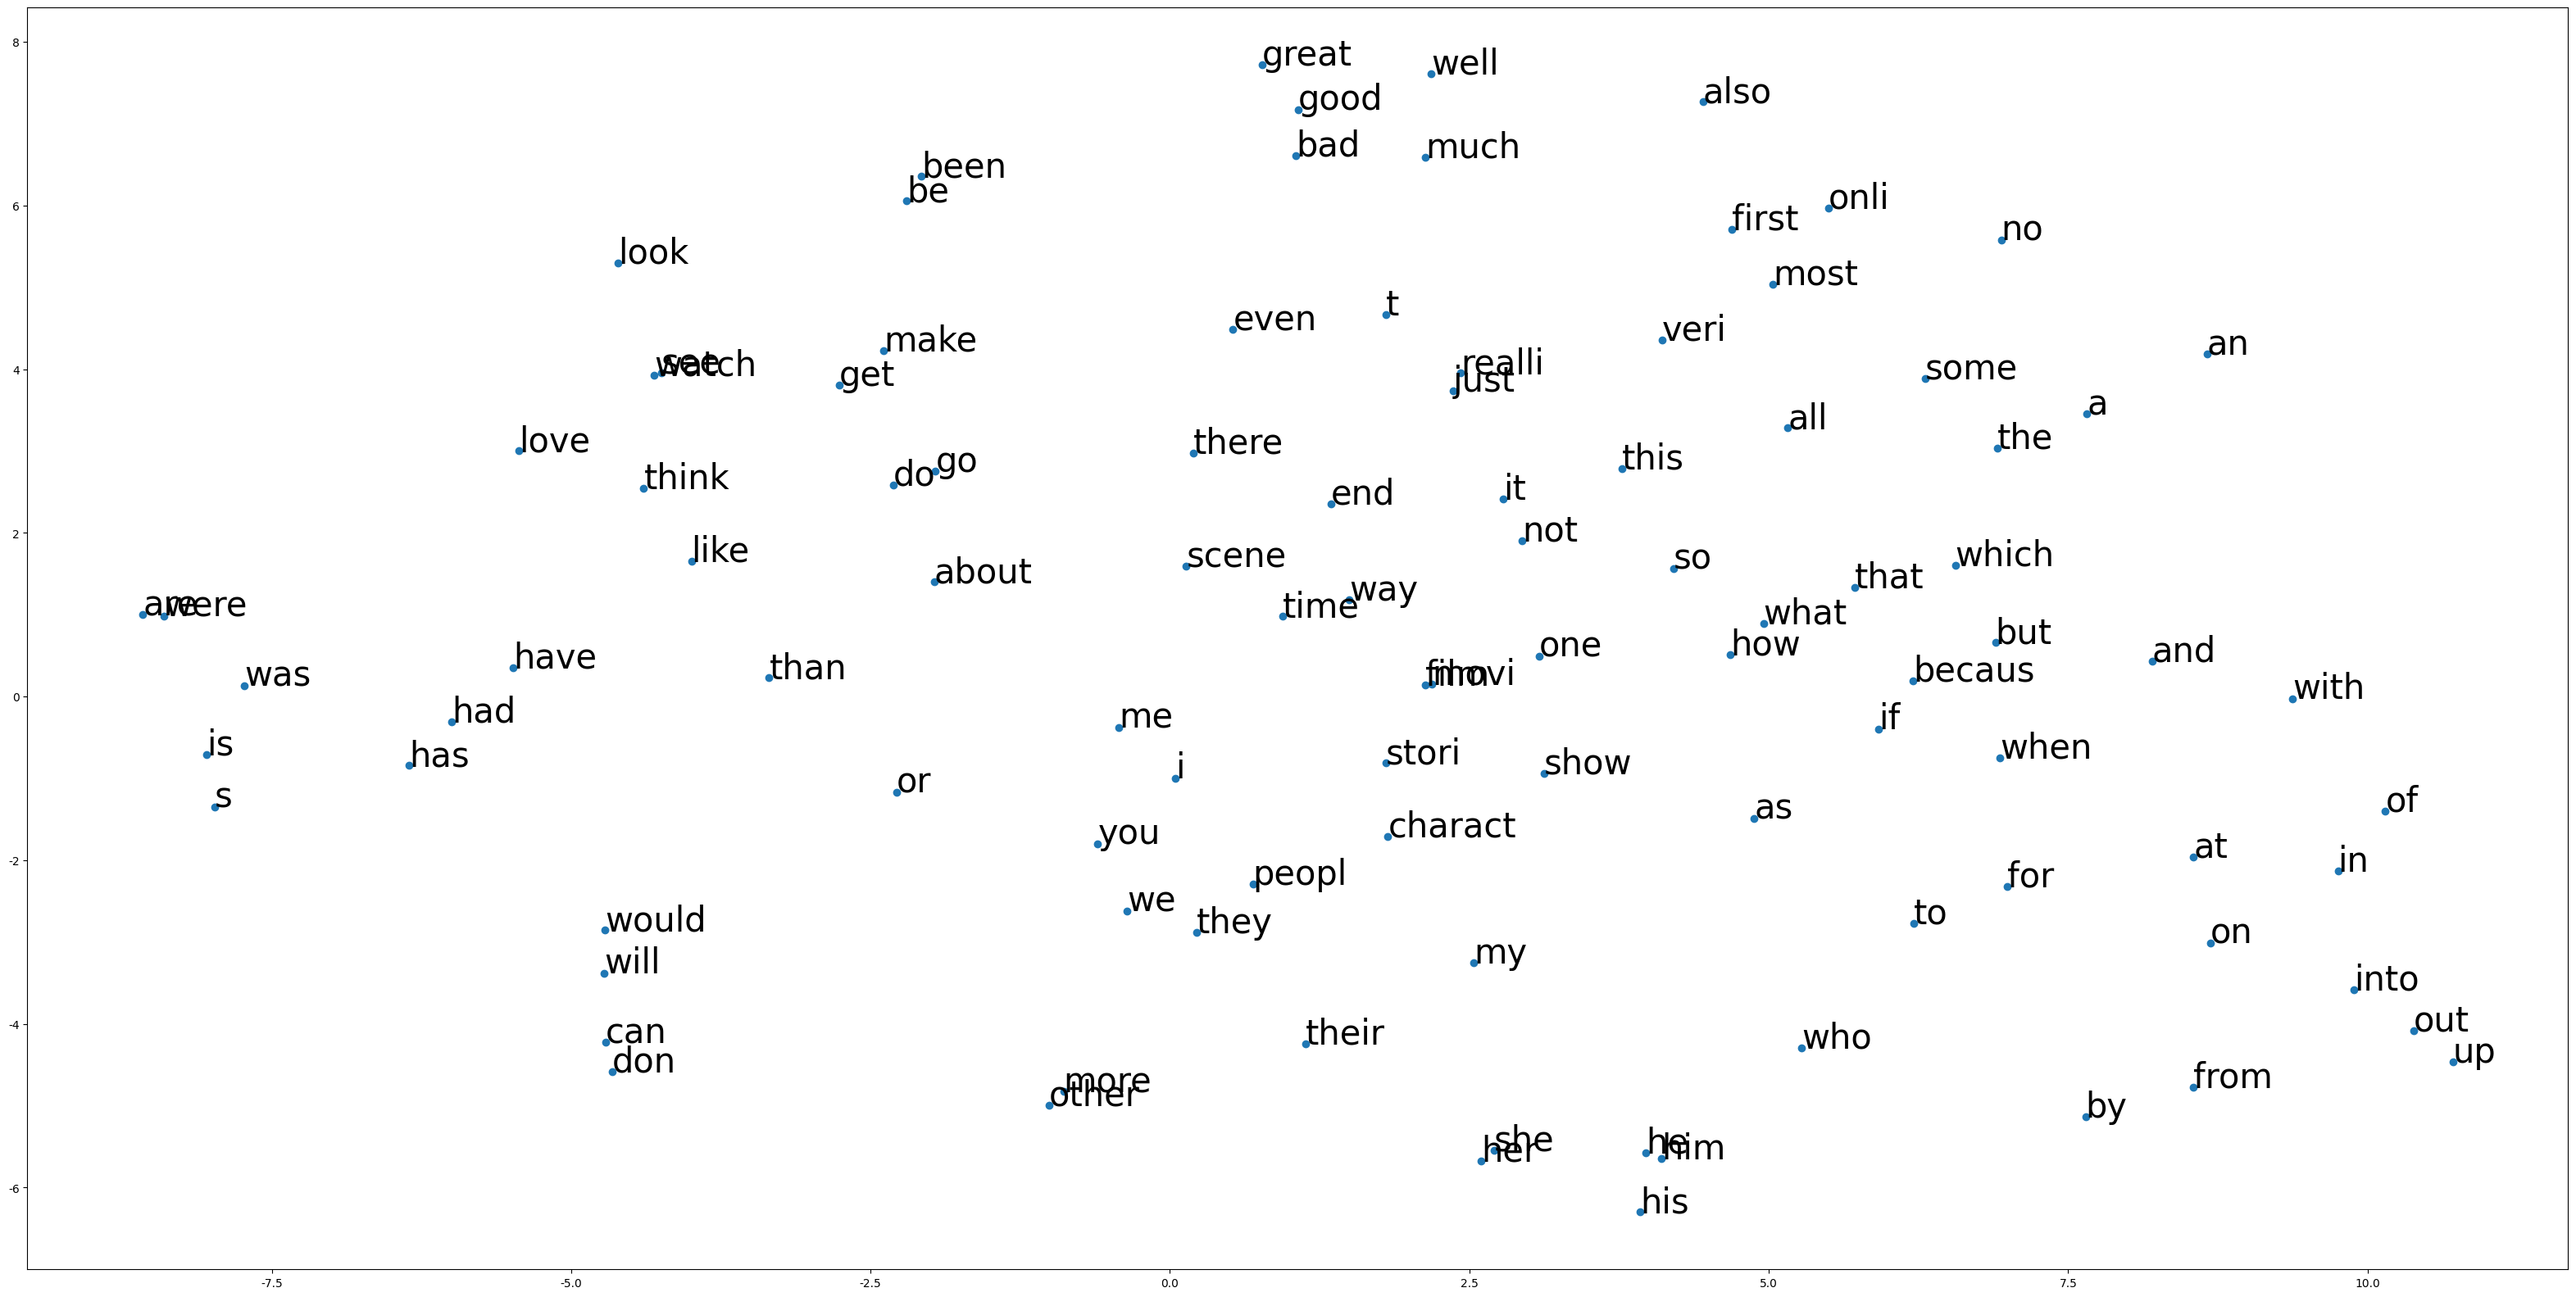

In [99]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()

## XGBoost: A Scalable Tree Boosting System
* 2015년 캐글 블로그에 xgboost를 사용하여 17건의 우승 솔루션이 공유됨 :  [Dato Winners’ Interview: 1st place, Mad Professors | No Free Hunch](http://blog.kaggle.com/2015/12/03/dato-winners-interview-1st-place-mad-professors/)
* 2016년 논문이 등록 됨 : [XGBoostArxiv.pdf](http://dmlc.cs.washington.edu/data/pdf/XGBoostArxiv.pdf)
* 공식문서 : [XGBoost Documents](https://xgboost.readthedocs.io/en/latest/)
* 분산형 그래디언트 부스팅 알고리즘
* 부스팅 알고리즘은?
    * 부스팅 알고리즘은 약한 예측모형들을 결합하여 강한 예측모형을 만드는 알고리즘
    * 배깅과 유사하게 초기 샘플데이터로 다수의 분류기를 만들지만 배깅과 다르게 순차적이다.
    * 랜덤포레스트의 배깅과는 다르게 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만듦
    * 결정트리(Decision Tree) 알고리즘의 연장선에 있음
    * 여러 개의 결정트리를 묶어 강력한 모델을 만드는 앙상블 방법
    * 분류와 회귀에 사용할 수 있음
    * 무작위성이 없으며 강력한 사전 가지치기를 사용
    * 참고 이미지 : http://www.birc.co.kr/2017/02/06/%EC%95%99%EC%83%81%EB%B8%94ensemble-%EB%B6%80%EC%8A%A4%ED%8C%85boosting/
    * 배깅과 부스팅의 차이점은 udacity에서 설명한 영상이 가장 도움이 되었음
        * 배깅 : https://www.youtube.com/watch?v=2Mg8QD0F1dQ
        * 부스팅 : https://www.youtube.com/watch?v=GM3CDQfQ4sw
* 타이타닉 경진대회에 사용 예제가 있음 [XGBoost example (Python) | Kaggle](https://www.kaggle.com/datacanary/xgboost-example-python/)


## [Mac OSX에서 XGBoost 설치하기](http://corazzon.github.io/xgboost-install-mac-osx)
* http://corazzon.github.io/xgboost-install-mac-osx

* [A Gentle Introduction to XGBoost for Applied Machine Learning - Machine Learning Mastery](https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/)

* https://speakerdeck.com/datasciencela/tianqi-chen-xgboost-overview-and-latest-news-la-meetup-talk

* datacamp의 XGboost 온라인 강의 : [Extreme Gradient Boosting with XGBoost](https://www.datacamp.com/courses/extreme-gradient-boosting-with-xgboost)

In [ ]:
"""강의에 사용한 아래 코드 대신 하단의 코드를 사용해 주세요."""
# import xgboost as xgb

# 멀티프로세싱은 nthread 였는데 n_jobs로 변경되었다고 한다.
# 설치 된 xgboost버전에 따라 파라메터가 다를 수 있으니
# 이 코드를 돌리고 터미널에서 $ top -o cpu 로 CPU자원을 100%넘게 사용하고 있는지 확인해 본다.
# params = {
#     'booster': 'gblinear',
#     'objective': 'multi:softmax',
#     'eval_metric': 'merror',
#     'eta' : 0.02,
#     'lambda': 2.0,
#     'alpha': 1.0,
#     'lambda_bias': 6.0,
#     'num_class': 5,
#     'n_jobs' : 4,
#     'silent': 1,
# }

# dtrain = xgb.DMatrix(X_train_tfidf_vector, label=train['sentiment'])
# %time booster = xgb.train(params, dtrain, num_boost_round=100)
# dtest = xgb.DMatrix(X_test_tfidf_vector)

# result = booster.predict(dtest)

# print(result.shape)
# result[0:10]

In [105]:
# XGBClassifier 불러오기
from xgboost import XGBClassifier

xgb = XGBClassifier(max_depth=7, n_estimators=300, objective="binary:logistic", random_state=1, tree_method='gpu_hist', predictor='gpu_predictor')

In [104]:
# 정답 레이블을 y_train 변수에 담아 사용합니다.
y_train = train['sentiment']

In [106]:
# XGBClassifier 로 학습합니다.
xgb.fit(train_data_features, train['sentiment'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor='gpu_predictor', random_state=1, ...)

In [107]:
# predict로 예측합니다.
result = xgb.predict(test_data_features)
result[:5]

array([1, 1, 1, 1, 1])